In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

In [ ]:
# https://www.kaggle.com/datasets/christophercorrea/prisoners-and-crime-in-united-states?select=crime_and_incarceration_by_state.csv
crimesAndIncarcerationsByState = pd.read_csv("datasets/crime_and_incarceration_by_state.csv", encoding='latin-1')
prisonCustodyByState = pd.read_csv("datasets/prison_custody_by_state.csv", encoding='latin-1')
crimeTotalsByState = pd.read_csv("datasets/ucr_by_state.csv", encoding='latin-1')

# https://www.kaggle.com/datasets/noriuk/us-education-datasets-unification-project
Education_ByState = pd.read_csv("datasets/states_all.csv", encoding='latin-1')

In [ ]:
crimesAndIncarcerationsByState

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,VIRGINIA,False,2016,29882,False,False,8414380.0,18495.0,482.0,NaN,2830.0,4826.0,10357.0,157292.0,20159.0,127285.0,9848.0
812,WASHINGTON,False,2016,17228,False,False,7280934.0,22101.0,195.0,NaN,3133.0,5649.0,13124.0,254994.0,49249.0,173423.0,32322.0
813,WEST VIRGINIA,False,2016,5899,False,False,1828637.0,6633.0,85.0,NaN,684.0,720.0,5144.0,37282.0,9127.0,25657.0,2498.0
814,WISCONSIN,False,2016,23163,False,False,5772917.0,17716.0,232.0,NaN,2005.0,4707.0,10772.0,111911.0,19498.0,82455.0,9958.0


In [ ]:
prisonCustodyByState

,ï»¿jurisdiction,includes_jails,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Federal,0,"149,852","158,216","168,144","177,600","186,364","190,844","197,285","198,414","205,087","206,968","214,774","216,915","214,989","209,561","195,622","188,311"
1,Alabama,0,"24,741","25,100","27,614","25,635","24,315","24,103","25,253","25,363","27,241","27,345","26,813","26,768","26,825","26,145","25,212","23,745"
2,Alaska,1,"4,570","4,351","4,472","4,534","4,798","5,052","5,151","4,997","5,472","5,369","6,216","6,308","5,081","6,323","5,247","4,378"
3,Arizona,0,"27,710","29,359","31,084","32,384","33,345","35,752","37,700","39,455","40,544","40,130","39,949","40,013","41,031","42,136","42,204","42,248"
4,Arkansas,0,"11,489","11,849","12,068","12,577","12,455","12,854","13,275","13,135","13,338","14,192","14,090","14,043","14,295","15,250","15,784","15,833"
5,California,0,"157,142","159,695","161,785","163,939","168,035","172,298","171,444","171,085","168,830","162,821","147,578","132,935","134,339","134,430","127,815","129,416"
6,Colorado,0,"17,278","18,636","19,450","19,655","21,063","22,051","22,666","23,211","22,725","22,752","21,862","20,328","20,184","20,469","19,959","19,486"
7,Connecticut,1,"17,507","18,716","18,023","17,993","17,928","18,902","19,438","19,905","18,938","18,629","17,877","17,164","17,319","16,814","16,024","15,040"
8,Delaware,1,"6,841","6,637","6,630","6,753","6,788","7,021","7,110","6,944","6,581","6,378","6,546","6,730","6,798","6,730","6,437","6,334"
9,Florida,0,"72,404","75,210","79,594","83,165","86,559","90,377","95,187","99,878","101,373","102,070","100,861","99,835","100,940","100,873","99,485","98,010"


In [ ]:
crimeTotalsByState

,ï»¿jurisdiction,year,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Alaska,2001.0,0.0,0.0,"633,630","3,735",39,501,NaN,514,"2,681","23,160","3,847","16,695","2,618",NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,2002.0,0.0,0.0,"641,482","3,627",33,511,NaN,489,"2,594","24,118","3,908","17,739","2,471",NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,2003.0,0.0,0.0,"648,280","3,877",39,605,NaN,446,"2,787","24,386","3,874","18,051","2,461",NaN,NaN,NaN,NaN,NaN,NaN
3,Alaska,2004.0,0.0,0.0,"657,755","4,159",37,558,NaN,447,"3,117","22,172","3,773","16,159","2,240",NaN,NaN,NaN,NaN,NaN,NaN
4,Alaska,2005.0,0.0,0.0,"663,253","4,194",32,538,NaN,537,"3,087","23,975","4,131","17,249","2,595",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Education_ByState

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [ ]:
# clean up states_all_extended
# set columns
Education_ByState.columns = [
    "State Key",
    "State",
    "Year",
    "Total Enrollment",
    "Total Revenue",
    "Federal Revenue",
    "State Revenue",
    "Local Revenue",
    "Total Expenditure",
    "Instruction Expenditure",
    "Support Services Expenditure",
    "Other Expenditure",
    "Capital Outlay Expenditure",
    "Total Enrollment (Pre-K)",
    "Total Enrollment (K)",
    "Total Enrollment (4)",
    "Total Enrollment (8)",
    "Total Enrollment (12)",
    "Total Enrollment (1-8)",
    "Total Enrollment (9-12)",
    "Total Enrollment (ALL)",
    "Average Math Score (4)",
    "Average Math Score (8)",
    "Average Reading Score (4)",
    "Average Reading Score (8)",
]

In [ ]:
##Education Dataset Cleanup
Education_ByStateCleaned = Education_ByState.drop(['State Key'], axis = 1)
Education_ByStateCleaned = Education_ByStateCleaned[Education_ByStateCleaned['Year'] <= 2016]
Education_ByStateCleaned = Education_ByStateCleaned[Education_ByStateCleaned['Year'] >= 2001]
Education_ByStateCleaned = Education_ByStateCleaned[Education_ByStateCleaned['State'] != 'NATIONAL']
Education_ByStateCleaned = Education_ByStateCleaned[Education_ByStateCleaned['State'] != 'DODEA']

#Dropping rows that have NA values for Instruction Expenditure
Education_ByStateCleaned = Education_ByStateCleaned.dropna(subset= ['Instruction Expenditure'])

Education_ByStateCleaned["Year"] = Education_ByStateCleaned["Year"].astype(int)



##Filtering Rows that have NAs for both enrollment estimates then filling one rows NAs with the other rows estimates. 
Education_ByStateCleaned[pd.notna(Education_ByStateCleaned['Total Enrollment']) | pd.notna(Education_ByStateCleaned['Total Enrollment (ALL)'])]
Education_ByStateCleaned['Total Enrollment'] = Education_ByStateCleaned['Total Enrollment'].fillna(Education_ByStateCleaned['Total Enrollment (ALL)'])
Education_ByStateCleaned.drop(['Total Enrollment (ALL)'], axis = 1)

,State,Year,Total Enrollment,Total Revenue,Federal Revenue,State Revenue,Local Revenue,Total Expenditure,Instruction Expenditure,Support Services Expenditure,Other Expenditure,Capital Outlay Expenditure,Total Enrollment (Pre-K),Total Enrollment (K),Total Enrollment (4),Total Enrollment (8),Total Enrollment (12),Total Enrollment (1-8),Total Enrollment (9-12),Average Math Score (4),Average Math Score (8),Average Reading Score (4),Average Reading Score (8)
459,ALABAMA,2001,728532.0,4832946.0,466150.0,2879636.0,1487160.0,5086045.0,2656393.0,1374265.0,426481.0,540284.0,11841.0,54148.0,58929.0,56591.0,42909.0,469591.0,201610.0,NaN,NaN,NaN,NaN
460,ALASKA,2001,131985.0,1325498.0,229297.0,732985.0,363216.0,1402839.0,701053.0,479510.0,48312.0,150279.0,1253.0,10095.0,10718.0,10702.0,8340.0,83540.0,39461.0,NaN,NaN,NaN,NaN
461,ARIZONA,2001,834387.0,5916342.0,580043.0,2729793.0,2606506.0,5858385.0,2538936.0,1701945.0,269157.0,1035457.0,6624.0,72119.0,74270.0,69643.0,52162.0,585206.0,249920.0,NaN,NaN,NaN,NaN
462,ARKANSAS,2001,449693.0,2974588.0,274406.0,2135281.0,564901.0,2951677.0,1616883.0,877225.0,153300.0,235346.0,1623.0,34981.0,35216.0,35372.0,28849.0,280237.0,131418.0,NaN,NaN,NaN,NaN
463,CALIFORNIA,2001,6045030.0,53288943.0,4280358.0,31374889.0,17633696.0,52082540.0,26641811.0,14127664.0,2570224.0,6755895.0,100351.0,457165.0,485301.0,461133.0,365907.0,3871843.0,1745295.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,VIRGINIA,2016,1283493.0,16259274.0,1058146.0,6297587.0,8903541.0,16497520.0,8944614.0,5164699.0,643506.0,1161323.0,33281.0,90800.0,99258.0,95234.0,90500.0,773615.0,389330.0,NaN,NaN,NaN,NaN
1271,WASHINGTON,2016,1083973.0,14964364.0,1097684.0,9211201.0,4655479.0,15253296.0,7087365.0,4904575.0,577606.0,2204059.0,13933.0,81102.0,86114.0,81039.0,90645.0,667327.0,339349.0,NaN,NaN,NaN,NaN
1272,WEST_VIRGINIA,2016,276764.0,3391579.0,358068.0,1863062.0,1170449.0,3366566.0,1804235.0,1127255.0,236487.0,181392.0,14949.0,19869.0,20324.0,19931.0,18155.0,159595.0,79442.0,NaN,NaN,NaN,NaN
1273,WISCONSIN,2016,857736.0,11697466.0,782610.0,5986763.0,4928093.0,11787535.0,5760418.0,3691439.0,508013.0,1082849.0,55436.0,57332.0,62408.0,61432.0,66303.0,488983.0,262681.0,NaN,NaN,NaN,NaN


In [ ]:
#crimetotal cleanup
crimeTotalsByStateCleaned = crimeTotalsByState.drop(["Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "crime_reporting_change", "crimes_estimated", "rape_legacy"], axis=1)
crimeTotalsByStateCleaned = crimeTotalsByStateCleaned.drop(range(869, 948)).reset_index(drop=True)
crimeTotalsByStateCleaned = crimeTotalsByStateCleaned.rename(columns={"ï»¿jurisdiction": "State", "year": "Year"})
crimeTotalsByStateCleaned["Year"] = crimeTotalsByStateCleaned["Year"].astype(int)
crimeTotalsByStateCleaned = crimeTotalsByStateCleaned[crimeTotalsByStateCleaned['Year'] >= 2001]
crimeTotalsByStateCleaned = crimeTotalsByStateCleaned[crimeTotalsByStateCleaned['Year'] <= 2016]

# crimeTotalsByStateCleaned = crimeTotalsByStateCleaned.dropna(subset=['rape_legacy', 'rape_revised'])
crimeTotalsByStateCleaned = crimeTotalsByStateCleaned.dropna(subset=['rape_revised'])
crimeTotalsByStateCleaned['State'] = crimeTotalsByStateCleaned['State'].str.upper()

#Cleaning all the columns with commas and converting to int
crimeTotalsByStateCleaned['state_population'] = crimeTotalsByStateCleaned['state_population'].str.replace(',', '').astype(int)
crimeTotalsByStateCleaned['violent_crime_total'] = crimeTotalsByStateCleaned['violent_crime_total'].str.replace(',', '').astype(int)
crimeTotalsByStateCleaned['murder_manslaughter'] = crimeTotalsByStateCleaned['murder_manslaughter'].str.replace(',', '').astype(int)
# crimeTotalsByStateCleaned['rape_legacy'] = crimeTotalsByStateCleaned['rape_legacy'].str.replace(',', '').astype(int)
crimeTotalsByStateCleaned['rape_revised'] = crimeTotalsByStateCleaned['rape_revised'].str.replace(',', '').astype(int)
crimeTotalsByStateCleaned['robbery'] = crimeTotalsByStateCleaned['robbery'].str.replace(',', '').astype(int)
crimeTotalsByStateCleaned['agg_assault'] = crimeTotalsByStateCleaned['agg_assault'].str.replace(',', '').astype(int)
crimeTotalsByStateCleaned['property_crime_total'] = crimeTotalsByStateCleaned['property_crime_total'].str.replace(',', '').astype(int)
crimeTotalsByStateCleaned['burglary'] = crimeTotalsByStateCleaned['burglary'].str.replace(',', '').astype(int)
crimeTotalsByStateCleaned['larceny'] = crimeTotalsByStateCleaned['larceny'].str.replace(',', '').astype(int)
crimeTotalsByStateCleaned['vehicle_theft'] = crimeTotalsByStateCleaned['vehicle_theft'].str.replace(',', '').astype(int)

crimeTotalsByStateCleaned = crimeTotalsByStateCleaned.rename(columns={"state_population": "State Population", 
                                                                      "violent_crime_total": "Violent Total Crime",
                                                                      "murder_manslaughter": "Murder",
                                                                      "rape_revised": "Rape(Revised)",
                                                                      "robbery": "Robbery",
                                                                      "agg_assault": "Agg Assault",
                                                                      "property_crime_total": "Property Crime Total",
                                                                      "burglary": "Burglary",
                                                                      "larceny": "Larceny",
                                                                      "vehicle_theft": "Vehicle Theft"})



# crimeTotalsByState

In [ ]:
crimeTotalsByStateCleaned

,State,Year,State Population,Violent Total Crime,Murder,Rape(Revised),Robbery,Agg Assault,Property Crime Total,Burglary,Larceny,Vehicle Theft
12,ALASKA,2013,737259,4709,34,925,623,3127,21211,2917,16599,1695
13,ALASKA,2014,736732,4684,41,771,629,3243,20334,3150,15445,1739
26,ARIZONA,2013,6634997,27576,355,3174,6656,17391,223294,48292,158036,16966
27,ARIZONA,2014,6731484,26916,319,3378,6249,16970,215240,43562,154091,17587
40,ALABAMA,2013,4833996,20834,346,2055,4645,13788,161835,42410,108862,10563
...,...,...,...,...,...,...,...,...,...,...,...,...
859,CALIFORNIA,2016,39296476,174796,1930,13702,54789,104375,1002070,188304,637010,176756
861,HAWAII,2016,1428683,3452,35,601,985,1831,42353,5983,30871,5499
863,OREGON,2016,4085989,10983,116,1784,2307,6776,121716,16919,91507,13290
865,WASHINGTON,2016,7280934,22101,195,3133,5649,13124,254994,49249,173423,32322


In [ ]:
Education_ByStateCleaned

,State,Year,Total Enrollment,Total Revenue,Federal Revenue,State Revenue,Local Revenue,Total Expenditure,Instruction Expenditure,Support Services Expenditure,Other Expenditure,Capital Outlay Expenditure,Total Enrollment (Pre-K),Total Enrollment (K),Total Enrollment (4),Total Enrollment (8),Total Enrollment (12),Total Enrollment (1-8),Total Enrollment (9-12),Total Enrollment (ALL),Average Math Score (4),Average Math Score (8),Average Reading Score (4),Average Reading Score (8)
459,ALABAMA,2001,728532.0,4832946.0,466150.0,2879636.0,1487160.0,5086045.0,2656393.0,1374265.0,426481.0,540284.0,11841.0,54148.0,58929.0,56591.0,42909.0,469591.0,201610.0,737190.0,NaN,NaN,NaN,NaN
460,ALASKA,2001,131985.0,1325498.0,229297.0,732985.0,363216.0,1402839.0,701053.0,479510.0,48312.0,150279.0,1253.0,10095.0,10718.0,10702.0,8340.0,83540.0,39461.0,134358.0,NaN,NaN,NaN,NaN
461,ARIZONA,2001,834387.0,5916342.0,580043.0,2729793.0,2606506.0,5858385.0,2538936.0,1701945.0,269157.0,1035457.0,6624.0,72119.0,74270.0,69643.0,52162.0,585206.0,249920.0,922180.0,NaN,NaN,NaN,NaN
462,ARKANSAS,2001,449693.0,2974588.0,274406.0,2135281.0,564901.0,2951677.0,1616883.0,877225.0,153300.0,235346.0,1623.0,34981.0,35216.0,35372.0,28849.0,280237.0,131418.0,449805.0,NaN,NaN,NaN,NaN
463,CALIFORNIA,2001,6045030.0,53288943.0,4280358.0,31374889.0,17633696.0,52082540.0,26641811.0,14127664.0,2570224.0,6755895.0,100351.0,457165.0,485301.0,461133.0,365907.0,3871843.0,1745295.0,6247726.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,VIRGINIA,2016,1283493.0,16259274.0,1058146.0,6297587.0,8903541.0,16497520.0,8944614.0,5164699.0,643506.0,1161323.0,33281.0,90800.0,99258.0,95234.0,90500.0,773615.0,389330.0,1287026.0,NaN,NaN,NaN,NaN
1271,WASHINGTON,2016,1083973.0,14964364.0,1097684.0,9211201.0,4655479.0,15253296.0,7087365.0,4904575.0,577606.0,2204059.0,13933.0,81102.0,86114.0,81039.0,90645.0,667327.0,339349.0,1101711.0,NaN,NaN,NaN,NaN
1272,WEST_VIRGINIA,2016,276764.0,3391579.0,358068.0,1863062.0,1170449.0,3366566.0,1804235.0,1127255.0,236487.0,181392.0,14949.0,19869.0,20324.0,19931.0,18155.0,159595.0,79442.0,273855.0,NaN,NaN,NaN,NaN
1273,WISCONSIN,2016,857736.0,11697466.0,782610.0,5986763.0,4928093.0,11787535.0,5760418.0,3691439.0,508013.0,1082849.0,55436.0,57332.0,62408.0,61432.0,66303.0,488983.0,262681.0,864432.0,NaN,NaN,NaN,NaN


In [ ]:
CrimeEducationMerged = pd.merge(Education_ByStateCleaned, crimeTotalsByStateCleaned, on=['State', 'Year'])

pd.set_option('display.max_columns', None)
display(CrimeEducationMerged)

,State,Year,Total Enrollment,Total Revenue,Federal Revenue,State Revenue,Local Revenue,Total Expenditure,Instruction Expenditure,Support Services Expenditure,Other Expenditure,Capital Outlay Expenditure,Total Enrollment (Pre-K),Total Enrollment (K),Total Enrollment (4),Total Enrollment (8),Total Enrollment (12),Total Enrollment (1-8),Total Enrollment (9-12),Total Enrollment (ALL),Average Math Score (4),Average Math Score (8),Average Reading Score (4),Average Reading Score (8),State Population,Violent Total Crime,Murder,Rape(Revised),Robbery,Agg Assault,Property Crime Total,Burglary,Larceny,Vehicle Theft
0,ALABAMA,2013,744548.0,7197439.0,811739.0,3898347.0,2487353.0,7487741.0,3747993.0,2317243.0,576737.0,643522.0,9415.0,59757.0,55719.0,58799.0,48965.0,458327.0,218705.0,746204.0,233.0,269.0,219.0,257.0,4833996,20834,346,2055,4645,13788,161835,42410,108862,10563
1,ALASKA,2013,131091.0,2545117.0,320938.0,1707449.0,516730.0,2665933.0,1324649.0,982442.0,87165.0,248505.0,3247.0,10632.0,9722.0,9677.0,9500.0,78835.0,38230.0,130944.0,236.0,282.0,209.0,261.0,737259,4709,34,925,623,3127,21211,2917,16599,1695
2,ARIZONA,2013,941726.0,8164324.0,1178356.0,2934165.0,4051803.0,7600581.0,3824071.0,2643742.0,368750.0,558466.0,8791.0,86258.0,84282.0,83849.0,84291.0,679992.0,327144.0,1102445.0,240.0,280.0,213.0,260.0,6634997,27576,355,3174,6656,17391,223294,48292,158036,16966
3,ARKANSAS,2013,477716.0,5067546.0,572096.0,3847045.0,648405.0,5226339.0,2545564.0,1694335.0,281692.0,533975.0,14984.0,39900.0,36321.0,36660.0,31646.0,294621.0,140185.0,489979.0,240.0,278.0,219.0,262.0,2958765,13705,158,1490,2261,9796,106477,30369,70430,5678
4,CALIFORNIA,2013,6208733.0,68868516.0,7836263.0,35141208.0,25891045.0,69727119.0,34194878.0,20595508.0,3461759.0,6160059.0,75951.0,506831.0,470515.0,472381.0,498403.0,3771067.0,1952314.0,6312623.0,234.0,276.0,213.0,262.0,38431393,154739,1746,10324,53640,89029,1018907,232058,621557,165292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,VIRGINIA,2014,1273211.0,15347862.0,1009659.0,5994897.0,8343306.0,15690444.0,8464947.0,4964725.0,619387.0,1041633.0,32839.0,93758.0,95200.0,95558.0,88256.0,771091.0,382598.0,1280381.0,NaN,NaN,NaN,NaN,8326289,16340,338,2310,4292,9400,160720,23122,129933,7665
77,WASHINGTON,2014,1057773.0,13040197.0,1030232.0,7833024.0,4176941.0,12806300.0,6267816.0,4035948.0,549588.0,1525815.0,12663.0,81212.0,79721.0,80391.0,87206.0,646445.0,333318.0,1073638.0,NaN,NaN,NaN,NaN,7061530,20136,174,2695,5640,11627,261706,55290,175769,30647
78,WISCONSIN,2014,865119.0,11330253.0,830568.0,5709579.0,4790106.0,11255186.0,5685955.0,3616770.0,498431.0,767074.0,55831.0,60424.0,60795.0,62034.0,65954.0,490627.0,264550.0,871432.0,NaN,NaN,NaN,NaN,5757564,16714,165,1674,5066,9809,120238,21216,89103,9919
79,WYOMING,2014,92732.0,1772633.0,112709.0,965213.0,694711.0,1775999.0,865932.0,555761.0,50715.0,287977.0,564.0,7997.0,7438.0,6927.0,6133.0,58774.0,26732.0,94067.0,NaN,NaN,NaN,NaN,584153,1142,16,174,53,899,11477,1689,9185,603


In [ ]:
##Exploring The Data

##Support Expenditure Per Student By State
EducationSupportExp = CrimeEducationMerged

#Selecting appropriate columns
EducationSupportExp = EducationSupportExp[['State', 'Year', 'Total Enrollment', 'Support Services Expenditure','Vehicle Theft']]

#Create Expenditure By Student
EducationSupportExp['Support Per Student'] = EducationSupportExp['Support Services Expenditure'] / EducationSupportExp['Total Enrollment']
EducationSupportExpGroupby = EducationSupportExp.groupby('State').mean()
EducationSupportExpGroupby = EducationSupportExpGroupby.reset_index().sort_values('Support Per Student', ascending= False)

EducationSupportExpGroupby.index = EducationSupportExpGroupby['State'] 

<ipython-input-280-a8d1f98a5cbd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EducationSupportExp['Support Per Student'] = EducationSupportExp['Support Services Expenditure'] / EducationSupportExp['Total Enrollment']


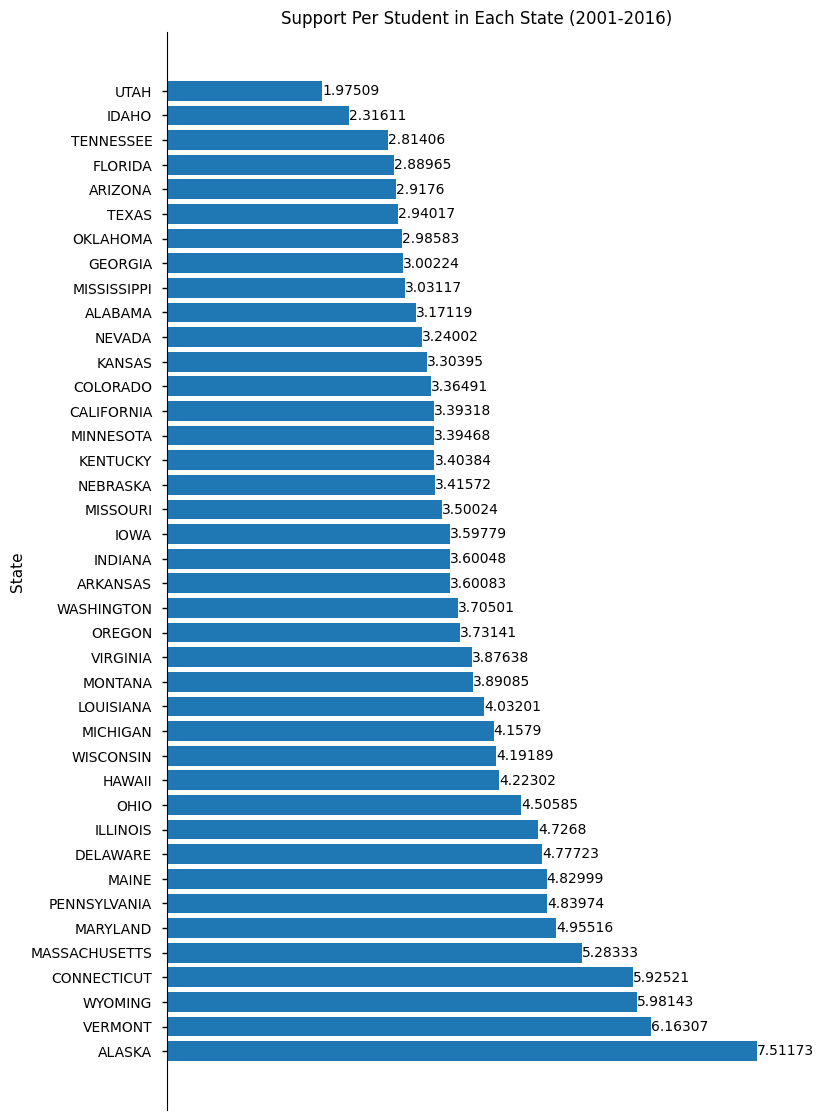

In [ ]:
#Creating Groupedby DF
EducationSupportExpGroupby = EducationSupportExp.groupby('State').mean()
EducationSupportExpGroupby = EducationSupportExpGroupby.reset_index().sort_values('Support Per Student', ascending= False)
EducationSupportExpGroupby.index = EducationSupportExpGroupby['State'] 

#Graphing Support
fig, ax = plt.subplots(figsize=(8,14))
bars = plt.barh(EducationSupportExpGroupby['State'],EducationSupportExpGroupby['Support Per Student'])
plt.style.use('seaborn-v0_8-notebook')
plt.ylabel("State")
ax.spines[['right','top','bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.bar_label(bars)

plt.title("Support Per Student in Each State (2001-2016)")
plt.show()

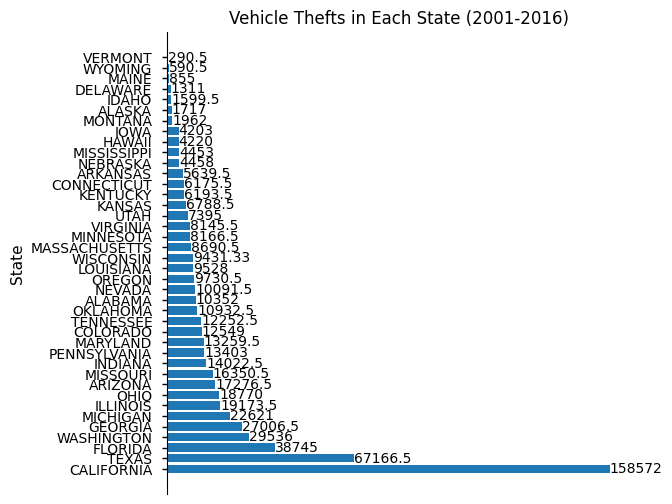

In [ ]:
#Graphing Vehicle Theft Scores
EducationSupportExpGroupby = EducationSupportExp.groupby('State').mean()
EducationSupportExpGroupby = EducationSupportExpGroupby.reset_index().sort_values('Vehicle Theft', ascending= False)
fig, ax = plt.subplots(figsize=(6,10))
bars = plt.barh(EducationSupportExpGroupby['State'],EducationSupportExpGroupby['Vehicle Theft'])
plt.style.use('seaborn-v0_8-notebook')
plt.ylabel("State")
ax.spines[['right','top','bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.bar_label(bars)

plt.title("Vehicle Thefts in Each State (2001-2016)")
plt.show()

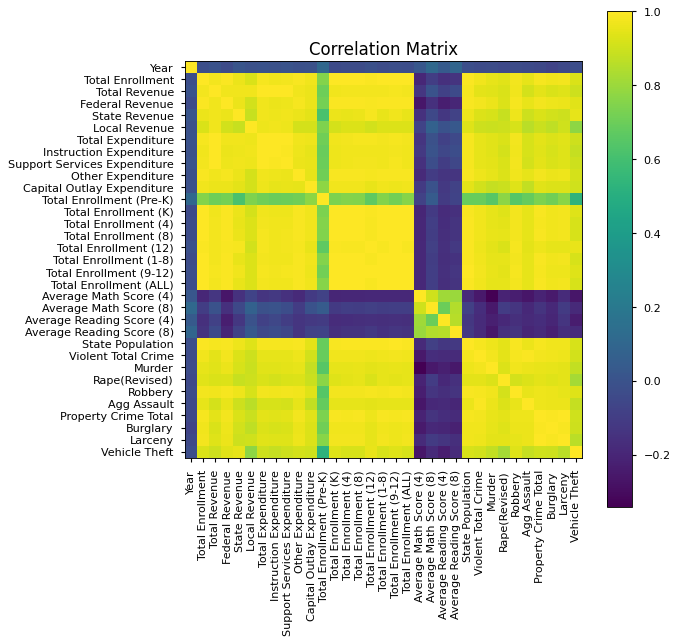

0.9009430345613494

In [ ]:
#Exploring Correlations Between Variables
CorrelationCrime = CrimeEducationMerged

#Create Expenditure By Student
# CorrelationEducation['Expenditure Per Student'] = CorrelationEducation['Instruction Expenditure'] / CorrelationEducation['Total Enrollment']
CorrelationCrime = CorrelationCrime.drop(['State'], axis = 1)
# CorrelationCrime = CorrelationCrime[pd.notna(CorrelationEducation['Average Math Score (4)']) & pd.notna(CorrelationEducation['Average Math Score (8)'])]


# Scaling data
Scaler = StandardScaler()
Scaler.fit(CorrelationCrime)
CorrelationCrime = pd.DataFrame(Scaler.transform(CorrelationCrime), 
        columns= CorrelationCrime.columns)

#Creating Correlation Matrix
corr = CorrelationCrime.dropna().corr()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()

#Selecting Certain Correlations From The Matrix
CorrelationCrime['Support Services Expenditure'].corr(CorrelationCrime['Vehicle Theft'])